# Generate Monitor Data as Alibaba Format

In [21]:
import pandas as pd
import json

In [17]:
usage_data = pd.read_csv('/data/clusterdata/cluster-trace-v2017/usage_data_small.csv')
init_data = pd.read_csv('/data/clusterdata/cluster-trace-v2017/init_data_small.csv')

In [18]:
usage_data.head()

,Unnamed: 0,start_time,pod_id,used_cpu,used_mem
0,88,39600,66,0.3600,0.020187
1,152,39600,65,0.4320,0.017345
2,1143,39600,32,0.3392,0.035539
3,1162,39600,31,1.1460,0.037702
4,1189,39600,33,0.4984,0.022630


In [19]:
init_data.head()

,Unnamed: 0,start_time,pod_id,node_id,used_cpu,used_mem
0,0,39600,0,0,1.8720,0.054504
1,1,39600,1,1,0.2784,0.024767
2,2,39600,2,2,0.0880,0.015963
3,3,39600,3,3,0.3280,0.022324
4,4,39600,4,4,0.4608,0.017227


In [22]:
with open('/data/fall_monitor_data.json','r') as f:
    monitor_data = json.load(f)

In [23]:
monitor_data

{'vm-4c8g-node2': [{'pod_name': 'buyservice-c989f4bd6-28mnk',
   'data': [['2022-04-11T03:49:15.783959Z', 42291200.0, 0.08683658240000416],
    ['2022-04-11T03:54:15.930178Z', 38051840.0, 0.19498164986665265],
    ['2022-04-11T03:59:16.017155Z', 37339136.0, 0.08706596683338527],
    ['2022-04-11T04:04:16.055559Z', 37642240.0, 0.13137333480002175],
    ['2022-04-11T04:09:16.171466Z', 41418752.0, 0.14722008373337303],
    ['2022-04-11T04:14:16.264164Z', 48353280.0, 0.1503796264666865],
    ['2022-04-11T04:19:16.349773Z', 48193536.0, 0.14700211840002642],
    ['2022-04-11T04:24:16.396457Z', 37281792.0, 0.14940023229998284],
    ['2022-04-11T04:29:16.514495Z', 38096896.0, 0.19312351049999657],
    ['2022-04-11T04:34:16.539369Z', 39628800.0, 0.105363076199986],
    ['2022-04-11T04:39:16.561561Z', 37306368.0, 0.11104730209996583],
    ['2022-04-11T04:44:16.579653Z', 38420480.0, 0.10598468566671121],
    ['2022-04-11T04:49:16.639100Z', 42635264.0, 0.1458435242999864],
    ['2022-04-11T04:54:1

In [24]:
monitor_data_df = pd.DataFrame(columns=['start_time','pod_id','node_id','used_cpu','used_mem'])

In [25]:
pod_dict = {}
node_dict = {}
pod_counter = 0
node_counter = 0

for node,pods in monitor_data.items():
    if node not in node_dict:
        node_dict[node] = node_counter
        node_counter += 1
    for pod in pods:
        if pod['pod_name'] in ['influxdb-776b79db44-g668h','webapp-d5585d547-kzqn8']:
            continue
        if pod['pod_name'] not in pod_dict:
            pod_dict[pod['pod_name']] = pod_counter
            pod_counter += 1 

In [26]:
pod_dict, node_dict

({'buyservice-c989f4bd6-28mnk': 0,
  'partservice-5f8f9bd749-52pvl': 1,
  'storageservice-69df9b8f8c-kx4hq': 2,
  'storageservice-1-9585bfc6b-g8spv': 3,
  'tableservice-f64f7b4b7-qwn5h': 4,
  'timeservice-7fcb68698b-qv4mg': 5},
 {'vm-4c8g-node2': 0, 'vm-4c8g-node3': 1})

In [33]:
import time

counter = 0
base_time = 1649620155
for node,pods in monitor_data.items():
    if node == 'vm-8c16g-node10':
        continue
    node_id = node_dict[node]
    for pod in pods:
        if pod['pod_name'] in ['influxdb-776b79db44-g668h','webapp-d5585d547-kzqn8']:
            continue
        pod_id = pod_dict[pod['pod_name']]
        for data in pod['data']:
            start_time = time.mktime(time.strptime(data[0],'%Y-%m-%dT%H:%M:%S.%fZ'))-base_time
            used_mem = data[1]
            used_cpu = data[2]
            monitor_data_df.loc[counter] = [start_time,pod_id,node_id,used_cpu,used_mem]
            counter+=1

In [34]:
monitor_data_df[(monitor_data_df['used_cpu']>0) & (monitor_data_df['used_mem']>0)]

,start_time,pod_id,node_id,used_cpu,used_mem
0,0.0,0.0,0.0,0.086837,42291200.0
2394,0.0,4.0,1.0,0.013319,40976384.0
1797,0.0,3.0,1.0,0.000465,93204480.0
1198,0.0,2.0,0.0,0.055912,134377472.0
599,0.0,1.0,0.0,0.134640,136036352.0
...,...,...,...,...,...
598,179447.0,0.0,0.0,0.000063,35258368.0
3589,179448.0,5.0,1.0,0.000074,36605952.0
2393,179448.0,3.0,1.0,0.000481,93167616.0
1796,179448.0,2.0,0.0,0.000460,130965504.0


In [35]:
monitor_data_df['pod_id'].unique()

array([0., 4., 3., 2., 1., 5.])

In [36]:
monitor_data_df['node_id'].unique()

array([0., 1.])

In [37]:
monitor_data_df = monitor_data_df.sort_values('start_time')

In [38]:
monitor_data_df.iloc[0]['start_time']

0.0

In [39]:
monitor_data_df.head()

,start_time,pod_id,node_id,used_cpu,used_mem
0,0.0,0.0,0.0,0.086837,42291200.0
2394,0.0,4.0,1.0,0.013319,40976384.0
1797,0.0,3.0,1.0,0.000465,93204480.0
1198,0.0,2.0,0.0,0.055912,134377472.0
599,0.0,1.0,0.0,0.134640,136036352.0


In [44]:
monitor_data_df['used_mem'] = monitor_data_df['used_mem']*10
monitor_data_df["used_cpu"] = monitor_data_df['used_cpu']*5

<AxesSubplot:xlabel='start_time'>

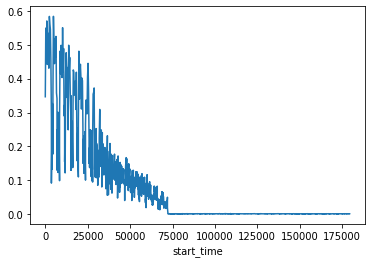

In [45]:
monitor_data_df[monitor_data_df['node_id']==0].groupby('start_time').sum()['used_cpu'].plot()

<AxesSubplot:xlabel='start_time'>

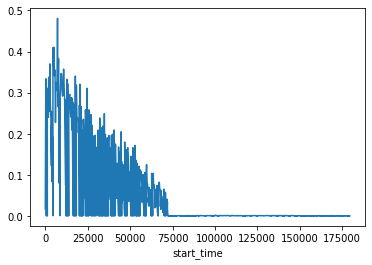

In [46]:
monitor_data_df[monitor_data_df['node_id']==1].groupby('start_time').sum()['used_cpu'].plot()

<AxesSubplot:xlabel='start_time'>

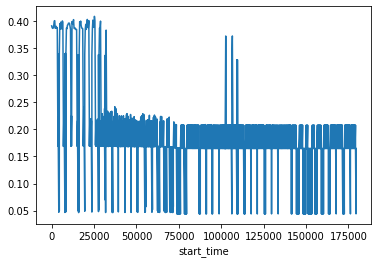

In [47]:
monitor_data_df[monitor_data_df['node_id']==0].groupby('start_time').sum()['used_mem'].plot()

<AxesSubplot:xlabel='start_time'>

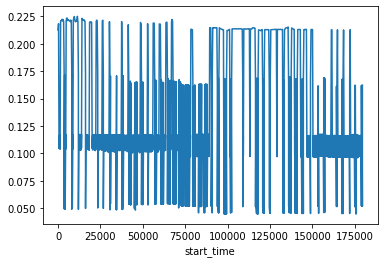

In [48]:
monitor_data_df[monitor_data_df['node_id']==1].groupby('start_time').sum()['used_mem'].plot()

In [49]:
init_data_small = monitor_data_df[monitor_data_df['start_time']==0]

In [50]:
usage_data_small = monitor_data_df[['start_time','pod_id','node_id','used_cpu','used_mem']]

In [51]:
init_data_small.to_csv('/data/fall_monitor_init_data.csv')
usage_data_small.to_csv('/data/fall_monitor_usage_data.csv')

In [1]:
import pandas as pd

usage_data = pd.read_csv('/data/monitor_usage_data.csv')

In [5]:
usage_data['start_time'].unique()

array([0.00000e+00, 8.60000e+01, 1.31000e+02, ..., 1.76009e+05,
       1.76029e+05, 1.76046e+05])

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-f_6_sejt because the default path (/home/user/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<AxesSubplot:xlabel='start_time'>

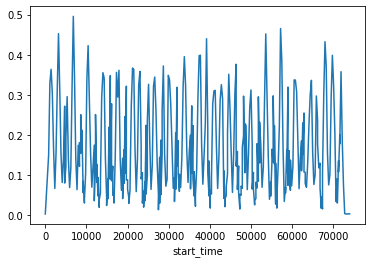

In [1]:
import pandas as pd
init_data = pd.read_csv('/data/monitor_init_data.csv')
usage_data = pd.read_csv('/data/monitor_usage_data.csv')
monitor_data_df = usage_data
monitor_data_df[monitor_data_df['node_id']==0].groupby('start_time').sum()['used_cpu'].plot()

<AxesSubplot:xlabel='start_time'>

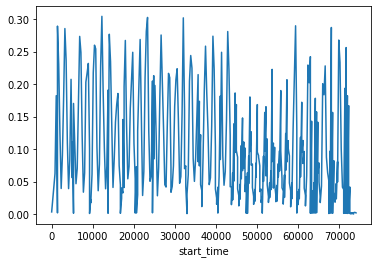

In [2]:
monitor_data_df[monitor_data_df['node_id']==1].groupby('start_time').sum()['used_cpu'].plot()

<AxesSubplot:xlabel='start_time'>

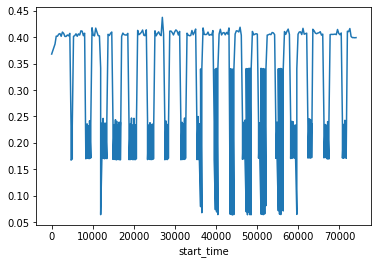

In [3]:
monitor_data_df[monitor_data_df['node_id']==0].groupby('start_time').sum()['used_mem'].plot()

<AxesSubplot:xlabel='start_time'>

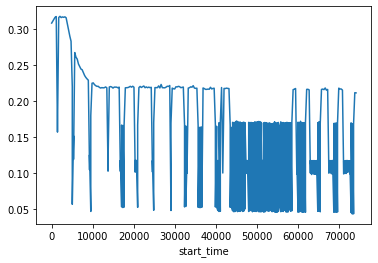

In [4]:
monitor_data_df[monitor_data_df['node_id']==1].groupby('start_time').sum()['used_mem'].plot()

In [52]:
import pandas as pd
init_data = pd.read_csv('/data/fall_monitor_init_data.csv')
usage_data = pd.read_csv('/data/fall_monitor_usage_data.csv')
usage_data.head()

,Unnamed: 0,start_time,pod_id,node_id,used_cpu,used_mem
0,0,0.0,0.0,0.0,0.108546,0.052864
1,2394,0.0,4.0,1.0,0.016649,0.051220
2,1797,0.0,3.0,1.0,0.000581,0.116506
3,1198,0.0,2.0,0.0,0.069890,0.167972
4,599,0.0,1.0,0.0,0.168300,0.170045


In [53]:
df = usage_data[['start_time', 'used_cpu', 'used_mem']].set_index('start_time')

In [54]:
df['used_cpu'] = usage_data.groupby(['start_time','node_id']).sum().mean(level='start_time')['used_cpu']
df['used_mem'] = usage_data.groupby(['start_time','node_id']).sum().mean(level='start_time')['used_mem']

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>],
      dtype=object)

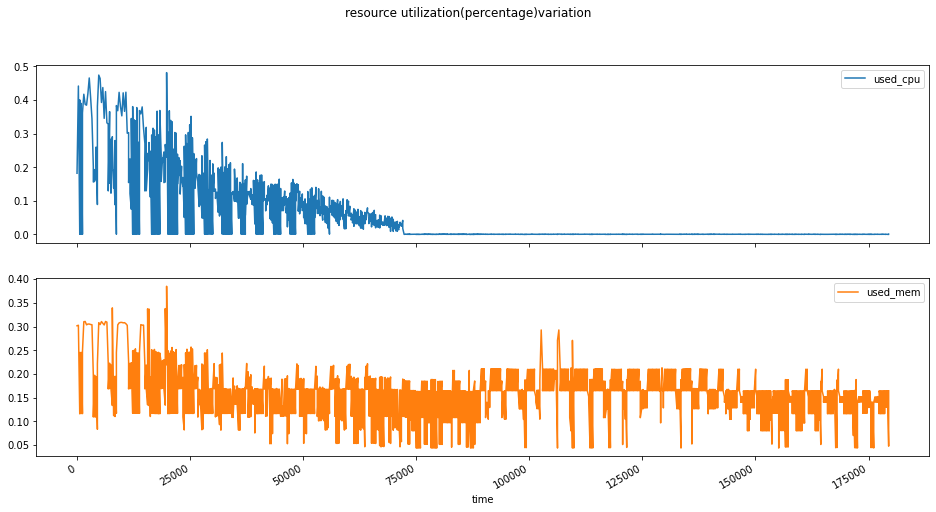

In [55]:
df[['used_cpu','used_mem']].plot(title='resource utilization(percentage)variation',xlabel='time',subplots=True,figsize=(16,8))